<p><span style="font-size: 18px;">In this assignment four tasks are requested:</span></p>
<ol>
    <li><span style="font-size: 18px;">Plot the 30-day mortality rates for heart attack.</span></li>
    <li><span style="font-size: 18px;">Finding the best hospital in a state.</span></li>
    <li><span style="font-size: 18px;">Ranking hospitals by the outcome in a state.</span></li>
    <li><span style="font-size: 18px;">Ranking hospitals in all states.&nbsp;</span></li>
</ol>
<p><br></p>

# Task 1

In [3]:
# Reading in data
outcome <- read.csv('outcome-of-care-measures.csv', colClasses = 'character')

In [4]:
head(outcome)

Provider.Number,Hospital.Name,Address.1,Address.2,Address.3,City,State,ZIP.Code,County.Name,Phone.Number,...,Lower.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Upper.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Number.of.Patients...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Footnote...Hospital.30.Day.Readmission.Rates.from.Heart.Failure,Hospital.30.Day.Readmission.Rates.from.Pneumonia,Comparison.to.U.S..Rate...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Lower.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Upper.Readmission.Estimate...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Number.of.Patients...Hospital.30.Day.Readmission.Rates.from.Pneumonia,Footnote...Hospital.30.Day.Readmission.Rates.from.Pneumonia
010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,,,DOTHAN,AL,36301,HOUSTON,3347938701,...,21.3,26.5,891,,17.1,No Different than U.S. National Rate,14.4,20.4,400,
010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,,,BOAZ,AL,35957,MARSHALL,2565938310,...,19.2,26.1,264,,17.6,No Different than U.S. National Rate,15.0,20.6,374,
010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,,,FLORENCE,AL,35631,LAUDERDALE,2567688400,...,17.2,22.9,614,,16.9,No Different than U.S. National Rate,14.7,19.5,842,
010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,,,OPP,AL,36467,COVINGTON,3344933541,...,22.4,31.9,135,,19.4,No Different than U.S. National Rate,15.9,23.2,254,
010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,,,LUVERNE,AL,36049,CRENSHAW,3343353374,...,19.9,30.2,59,,18.0,No Different than U.S. National Rate,14.0,22.8,56,
010010,MARSHALL MEDICAL CENTER NORTH,8000 ALABAMA HIGHWAY 69,,,GUNTERSVILLE,AL,35976,MARSHALL,2565718000,...,20.1,28.2,173,,18.7,No Different than U.S. National Rate,15.7,22.2,326,


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

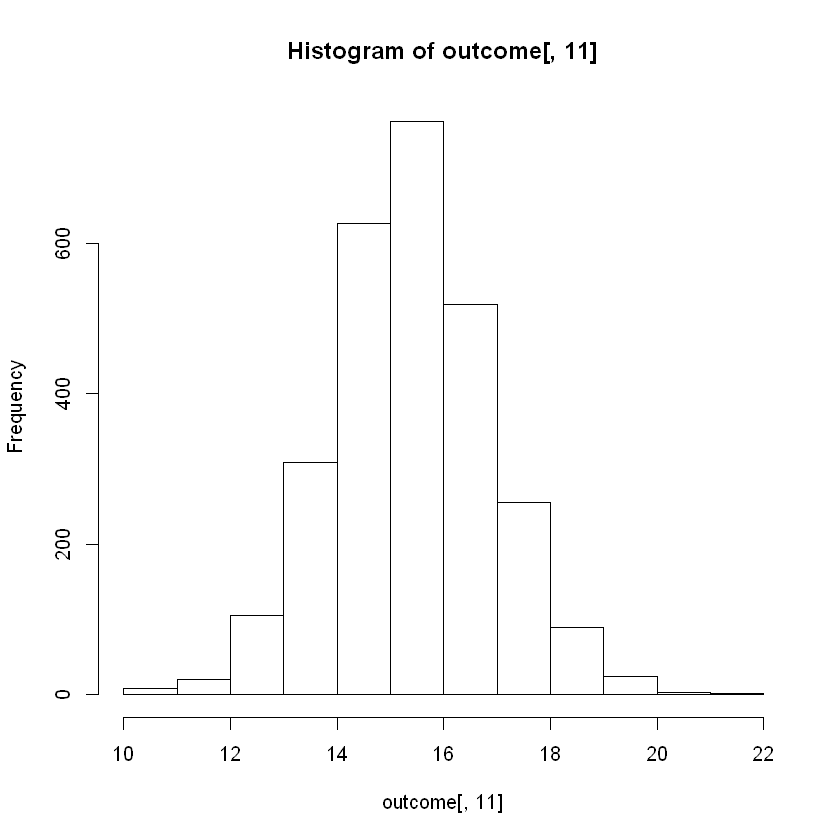

In [6]:
outcome[, 11] <- as.numeric(outcome[, 11])
hist(outcome[, 11])

# Task 2

In [7]:
best <- function(state, outcome) {
    
    ## start by reading the outcome data
    file_data <- read.csv("outcome-of-care-measures.csv", sep = ",")
    
    ## validate the state and outcome
    states_val <- c("AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY")
    outcomes_val <- c("heart attack", "heart failure", "pneumonia")
    ## display error message if wrong
    if (!is.element(state, states_val)) stop("invalid state") 
    if (!is.element(outcome, outcomes_val)) stop("invalid outcome") 
    
    ## Identify hospital with lowest 30-day of deaths, return the name
    data <- file_data[file_data$State == state,]
    header_name <- NULL
    if (outcome == "heart attack") {
        header_name <- "Hospital.30.Day.Death..Mortality..Rates.from.Heart.Attack"
    } else if (outcome == "heart failure") {
        header_name <- "Hospital.30.Day.Death..Mortality..Rates.from.Heart.Failure"
    } else {
        header_name <- "Hospital.30.Day.Death..Mortality..Rates.from.Pneumonia"
    }
    mortality_rate <- data[,header_name]
    mortality_rate <- mortality_rate[!mortality_rate == "Not Available"]
    mortality_rate <- as.numeric(as.character(mortality_rate))
    ## find the minimum
    min_rate <- min(mortality_rate)
    ## best is the one with min_rate
    best_hosps <- data[data[,header_name] == min_rate,]
    hosp_names <- sort(best_hosps[,"Hospital.Name"])
    return(as.character(hosp_names[1]))
}

# Task 3

In [9]:
rankhospital <- function(state, outcome, num = "best") {
  
  # Read outcome data
  out_data <- read.csv("outcome-of-care-measures.csv", sep = ",")
  
    ## validate the state and outcome
    states_val <- c("AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY")
    outcomes_val <- c("heart attack", "heart failure", "pneumonia")
    
    ## display error message if wrong
    if (!is.element(state, states_val)) stop("invalid state") 
    if (!is.element(outcome, outcomes_val)) stop("invalid outcome") 
    
     ## Returns hospital name in that state with lowest 30-day death
    data <- file_data[file_data$State == state,]
    header_name <- NULL
    if (outcome == "heart attack") header_name <- "Hospital.30.Day.Death..Mortality..Rates.from.Heart.Attack"
    else if (outcome == "heart failure") header_name <- "Hospital.30.Day.Death..Mortality..Rates.from.Heart.Failure"
    else header_name <- "Hospital.30.Day.Death..Mortality..Rates.from.Pneumonia"
    
    sorted_data <- data[order(as.numeric(as.character(data[,header_name])), as.character(data[,"Hospital.Name"])),]
    sorted_data <- sorted_data[!sorted_data[,header_name] == "Not Available",]
    if (num == "best") {
        return(best(state, outcome))
    } else if (num == "worst") {
        return(tail(as.character(sorted_data[,"Hospital.Name"]), n = 1))
    }
    return(as.character(sorted_data[,"Hospital.Name"][num]))


}

# Task 4

In [10]:
rankall <- function(outcome, num = "best") {
    
    ## Reads outcome data
    file_data <- read.csv("outcome-of-care-measures.csv", sep = ",")
    
    ## Checks that state and outcome are valid
    valid_states <- c("AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY")
    valid_outcomes <- c("heart attack", "heart failure", "pneumonia")
    if (!is.element(outcome, valid_outcomes)) stop("invalid outcome")
    
    header_name <- NULL
    if (outcome == "heart attack") header_name <- "Hospital.30.Day.Death..Mortality..Rates.from.Heart.Attack"
    else if (outcome == "heart failure") header_name <- "Hospital.30.Day.Death..Mortality..Rates.from.Heart.Failure"
    else header_name <- "Hospital.30.Day.Death..Mortality..Rates.from.Pneumonia"
    
    hosps <- c()
    states <- c()
    
    ## For each state, finds the hospital of the given rank
    for (state in valid_states) {
        ranked_hosp <- c()
        data <- file_data[file_data$State == state,]        
        sorted_data <- data[order(as.numeric(as.character(data[,header_name])), as.character(data[,"Hospital.Name"])),]
        sorted_data <- sorted_data[!sorted_data[,header_name] == "Not Available",]
        if (num == "best") {
            ranked_hosp <- best(state, outcome)
        } else if (num == "worst") {
            ranked_hosp <- as.character(tail(sorted_data[,"Hospital.Name"], n = 1))
        } else {
            ranked_hosp <- as.character(sorted_data[,"Hospital.Name"][num])
        }
        hosps <- c(hosps, ranked_hosp)
    }
    result <- data.frame(hosps, valid_states)
    colnames(result) <- c("hospital", "state")
    return(result)
}